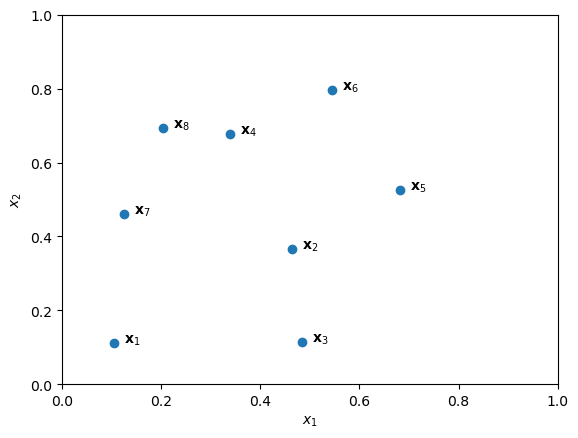

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# m=8 random training points on [0,1] x [0,1]
X = np.random.rand(8,2)

plt.plot(X[:,0], X[:,1], 'o')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(X.shape[0]):
    plt.text(X[i,0]+0.02, X[i,1], "$\mathbf{x}_{"+str(i+1)+"}$")
plt.show()

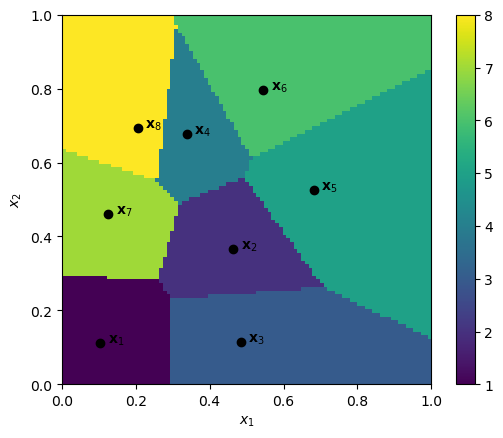

In [2]:
# sklearn's 1-Nearest Neighbours prediction for equispaced points on [0,1] x [0,1]
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X, np.arange(X.shape[0])+1) # Labels 1,...,m to colour space around each training point

# Make equispaced test points (pixels)
Xmesh, Ymesh = np.meshgrid(np.linspace(0,1,99), np.linspace(0,1,99))
Xpred = np.vstack([Xmesh.flatten(), Ymesh.flatten()]).T
ypred = nn.predict(Xpred)

# Plot points in Xpred coloured with the index i of training x_i that is nearest to them
plt.imshow(ypred.reshape(Xmesh.shape), extent=(0,1,0,1), origin='lower')
plt.colorbar()
plt.plot(X[:,0], X[:,1], 'ok')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(X.shape[0]):
    plt.text(X[i,0]+0.02, X[i,1], "$\mathbf{x}_{"+str(i+1)+"}$")
plt.show()

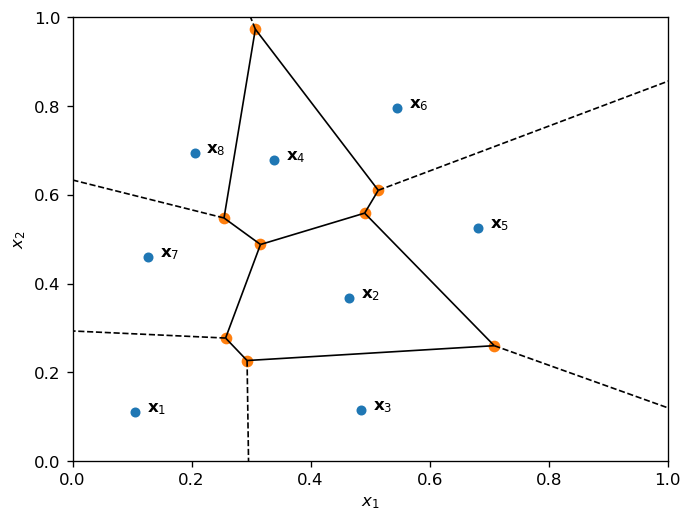

In [3]:
# Voronoi tesselation of a 2D space with scipy
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(X)
fig, ax = plt.subplots(dpi=120)
voronoi_plot_2d(vor, ax=ax, show_vertices=True, point_size=10)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([0,1])
plt.ylim([0,1])
for i in range(X.shape[0]):
    plt.text(X[i,0]+0.02, X[i,1], "$\mathbf{x}_{"+str(i+1)+"}$")
plt.show()    